<a href="https://colab.research.google.com/github/vegaFDaniel/Challenge-amigo-Secreto/blob/main/TelecomX_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extraccion y exploracion uinicial


In [1]:
import pandas as pd
import requests
import numpy as np

url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"
df = pd.read_json(url)

df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [3]:
response = requests.get(url)
data = response.json()

In [4]:
df_plano = pd.json_normalize(data)
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [5]:
df_plano.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [6]:
df_plano.rename(columns={
    'customerID': 'ID',
    'Churn': 'cancelo',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'mayor_de_65',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'meses_de_contrato',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_multiples',
    'internet.InternetService': 'servicio_internet',
    'internet.OnlineSecurity': 'seguridad_en_linea',
    'internet.OnlineBackup': 'soporte_en_linea',
    'internet.DeviceProtection': 'proteccion_dispositivos',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'servicio_tv',
    'internet.StreamingMovies': 'servicio_peliculas',
    'account.PaperlessBilling': 'facturas_electronicas',
    'account.PaymentMethod': 'metodo_pago',
    'account.Contract': 'tipo_contrato',
    'account.Charges.Monthly': 'gastos_mensuales',
    'account.Charges.Total': 'gastos_totales'
}, inplace=True)

In [7]:
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7267 non-null   object 
 1   cancelo                  7267 non-null   object 
 2   genero                   7267 non-null   object 
 3   mayor_de_65              7267 non-null   int64  
 4   tiene_pareja             7267 non-null   object 
 5   tiene_dependientes       7267 non-null   object 
 6   meses_de_contrato        7267 non-null   int64  
 7   servicio_telefonico      7267 non-null   object 
 8   lineas_multiples         7267 non-null   object 
 9   servicio_internet        7267 non-null   object 
 10  seguridad_en_linea       7267 non-null   object 
 11  soporte_en_linea         7267 non-null   object 
 12  proteccion_dispositivos  7267 non-null   object 
 13  soporte_tecnico          7267 non-null   object 
 14  servicio_tv             

In [8]:
#buscar valores unicos

In [9]:
# Verifique si hay valores únicos en cada columna
for col in df_plano.columns:
  print(f"valores únicos en la columna'{col}': {df_plano[col].nunique()}")
  if df_plano[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df_plano[col].unique())
    print('-' * 50)  #  mejor visualización

valores únicos en la columna'ID': 7267
valores únicos en la columna'cancelo': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'genero': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'mayor_de_65': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'tiene_pareja': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'tiene_dependientes': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'meses_de_contrato': 73
valores únicos en la columna'servicio_telefonico': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'lineas_multiples': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'servicio_internet': 3
['DSL' 'Fiber optic' 'No']
------------------------------------

In [10]:
#buscar valores ausentes o nulos
df_plano.isnull().sum()

,0
ID,0
cancelo,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependientes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [11]:
#Duplicados
print("Numero de duplicados", df_plano.duplicated().sum())

Numero de duplicados 0


In [12]:
# Vacíos o en blanco
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
ID,0
cancelo,224
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependientes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [13]:
# Eliminando las columnas de cancelo

df_plano = df_plano[df_plano['cancelo'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'cancelo':", len(df_plano))

Número de filas después de eliminar las vacías en 'cancelo': 7043


In [14]:
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7043 non-null   object 
 1   cancelo                  7043 non-null   object 
 2   genero                   7043 non-null   object 
 3   mayor_de_65              7043 non-null   int64  
 4   tiene_pareja             7043 non-null   object 
 5   tiene_dependientes       7043 non-null   object 
 6   meses_de_contrato        7043 non-null   int64  
 7   servicio_telefonico      7043 non-null   object 
 8   lineas_multiples         7043 non-null   object 
 9   servicio_internet        7043 non-null   object 
 10  seguridad_en_linea       7043 non-null   object 
 11  soporte_en_linea         7043 non-null   object 
 12  proteccion_dispositivos  7043 non-null   object 
 13  soporte_tecnico          7043 non-null   object 
 14  servicio_tv              7043

In [15]:
#corregir datos

In [16]:
# Convertir a float
#Cambiando la columna "gastos_totales" a Float

df_plano['gastos_totales'] = pd.to_numeric(df_plano['gastos_totales'], errors='coerce')
print(df_plano['gastos_totales'].dtype)

float64


/tmp/ipython-input-1946841211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plano['gastos_totales'] = pd.to_numeric(df_plano['gastos_totales'], errors='coerce')


In [17]:
# Eliminando las columnas de cancelo

df_plano = df_plano[df_plano['cancelo'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'cancelo':", len(df_plano))

Número de filas después de eliminar las vacías en 'cancelo': 7043


In [18]:
# Vacíos o en blanco
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
ID,0
cancelo,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependientes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


In [19]:
# Convertir a str
vars_a_str = ['ID', 'genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']

# Convertirlas a string
df_plano[vars_a_str] = df_plano[vars_a_str].astype(str)

In [20]:
# creo una variable que contiene todas las variables que van a ser transformadas en booleanos

columnas_bool = ['cancelo','mayor_de_65', 'tiene_pareja', 'tiene_dependientes', 'facturas_electronicas']
df_plano[columnas_bool] = df_plano[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)

/tmp/ipython-input-143194054.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plano[columnas_bool] = df_plano[columnas_bool].replace({'Yes': True, 'No': False}).infer_objects(copy=False)


In [21]:
df_plano['Cuentas_Diarias'] = df_plano['gastos_mensuales'] / 30
print(df_plano[['gastos_mensuales', 'Cuentas_Diarias']])

      gastos_mensuales  Cuentas_Diarias
0                65.60         2.186667
1                59.90         1.996667
2                73.90         2.463333
3                98.00         3.266667
4                83.90         2.796667
...                ...              ...
7262             55.15         1.838333
7263             85.10         2.836667
7264             50.30         1.676667
7265             67.85         2.261667
7266             59.00         1.966667

[7043 rows x 2 columns]


In [22]:
df_plano.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,Cuentas_Diarias
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


Decriptivo

In [23]:
df_plano.describe()

,mayor_de_65,meses_de_contrato,gastos_mensuales,gastos_totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [24]:
import plotly.express as px

In [25]:
px.histogram(df_plano, x = 'genero',
             text_auto = True,
             color = 'cancelo',
             barmode = 'group',
             color_discrete_map= {
                 'Sí': 'deeppink',
                 'No': 'green'
                  }
             )

In [26]:
px.histogram(df_plano,
             x = 'mayor_de_65',
             text_auto = True,
             color = 'cancelo',
             barmode = 'group',
             color_discrete_map={
                 'Sí': 'deeppink',
                'No': 'green'
                  }
             )

In [27]:
px.histogram(df_plano, x = 'meses_de_contrato', text_auto = True, color = 'cancelo', barmode = 'group')

In [28]:
# identifica variables categoricas

columnas_categoricas = df_plano.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
columnas_categoricas

['ID',
 'cancelo',
 'genero',
 'tiene_pareja',
 'tiene_dependientes',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_en_linea',
 'soporte_en_linea',
 'proteccion_dispositivos',
 'soporte_tecnico',
 'servicio_tv',
 'servicio_peliculas',
 'tipo_contrato',
 'facturas_electronicas',
 'metodo_pago']

In [29]:
print(df_plano['cancelo'].dtype)

bool


In [30]:
# Realizar recuentos cruzados con cancelo

for col in columnas_categoricas:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df_plano[col], df_plano['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por ID ---
cancelo     False  True 
ID                      
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7043 rows x 2 columns]

--- Porcentaje de evasión por cancelo ---
cancelo  False  True 
cancelo              
False    100.0    0.0
True       0.0  100.0

--- Porcentaje de evasión por genero ---
cancelo  False  True 
genero               
Female   73.08  26.92
Male     73.84  26.16

--- Porcentaje de evasión por tiene_pareja ---
cancelo       False  True 
tiene_pareja              
False         67.04  32.96
True          80.34  19.66

--- Porcentaje de evasión por tiene_dependientes ---
cancelo             False  True 
tiene_dependientes              
False               68.72  31.28
True                84.55  15.45

--- Porc

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Definir colores personalizados
AZUL = '#1f77b4'
VERDE = '#2ca02c'
GRIS = '#444444'

def cancelacion_tipo_internet():

    # Ordenar categorías según porcentaje de cancelación
    orden = df_plano.groupby('servicio_internet')['cancelo'].mean().sort_values().index

    # Crear gráfica
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x='servicio_internet',
        y='cancelo',
        data=df_plano,
        estimator=lambda x: x.mean() * 100,
        order=orden,
        errorbar=None
    )

    # Asignar colores barra por barra
    for i, bar in enumerate(ax.patches):
        color = AZUL if i % 2 == 0 else VERDE
        bar.set_facecolor(color)

    # Añadir porcentaje sobre cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

    # Personalización
    ax.set_title('Cancelación por tipo de Internet', fontsize=18, color=GRIS)

    # Eje Y: suprimir ticks y etiqueta
    ax.set_ylabel('')
    ax.set_yticklabels([])
    ax.tick_params(axis='y', length=0)

    # Eje X: etiquetas en verde, tamaño 12
    ax.set_xlabel('')
    ax.tick_params(axis='x', labelsize=12, colors=VERDE)

    # Eliminar bordes superior, derecho e izquierdo
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    return plt



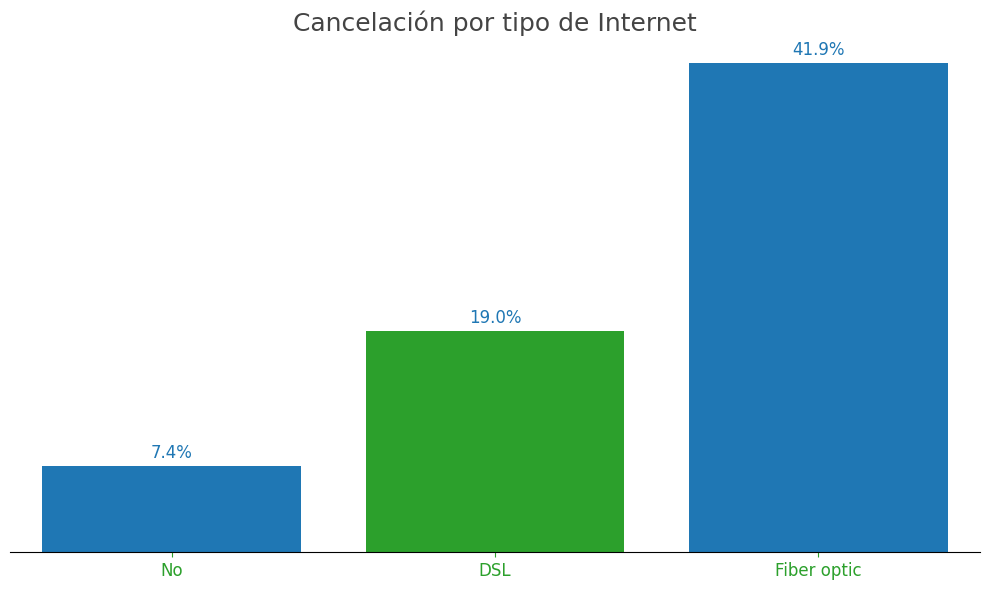

In [33]:
cancelacion_tipo_internet().show()



In [34]:
def cancelacion_tipo_contrato():

  # Ordenar categorías según porcentaje de cancelación
  orden = df_plano.groupby('tipo_contrato')['cancelo'].mean().sort_values().index

  # Crear gráfica
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(
      x='tipo_contrato',
      y='cancelo',
      data=df_plano,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None
  )

  # Asignar colores barra por barra (alternancia azul/verde)
  for i, bar in enumerate(ax.patches):
      color = AZUL if i % 2 == 0 else VERDE
      bar.set_facecolor(color)

  # Añadir porcentaje sobre cada barra
  for container in ax.containers:
      ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  # Personalización
  ax.set_title('Cancelación por tipo de contrato', fontsize=18, color=GRIS)

  # Eje Y: suprimir ticks y etiqueta
  ax.set_ylabel('')
  ax.set_yticklabels([])  # oculta los valores del eje y
  ax.tick_params(axis='y', length=0)  # oculta las marcas de ticks del eje y

  # Eje X: etiquetas en azul, tamaño 12
  ax.set_xlabel('')
  ax.tick_params(axis='x', labelsize=12, colors=AZUL)

  # Eliminar bordes superior, derecho e izquierdo
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  # Fondo gris
  ax.set_facecolor('#f0f0f0')  # Fondo del gráfico
  plt.gcf().set_facecolor('#f0f0f0')  # Fondo de la figura completa

  plt.tight_layout()

  return plt

In [35]:
print(df_plano.columns.tolist())

['ID', 'cancelo', 'genero', 'mayor_de_65', 'tiene_pareja', 'tiene_dependientes', 'meses_de_contrato', 'servicio_telefonico', 'lineas_multiples', 'servicio_internet', 'seguridad_en_linea', 'soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas', 'tipo_contrato', 'facturas_electronicas', 'metodo_pago', 'gastos_mensuales', 'gastos_totales', 'Cuentas_Diarias']


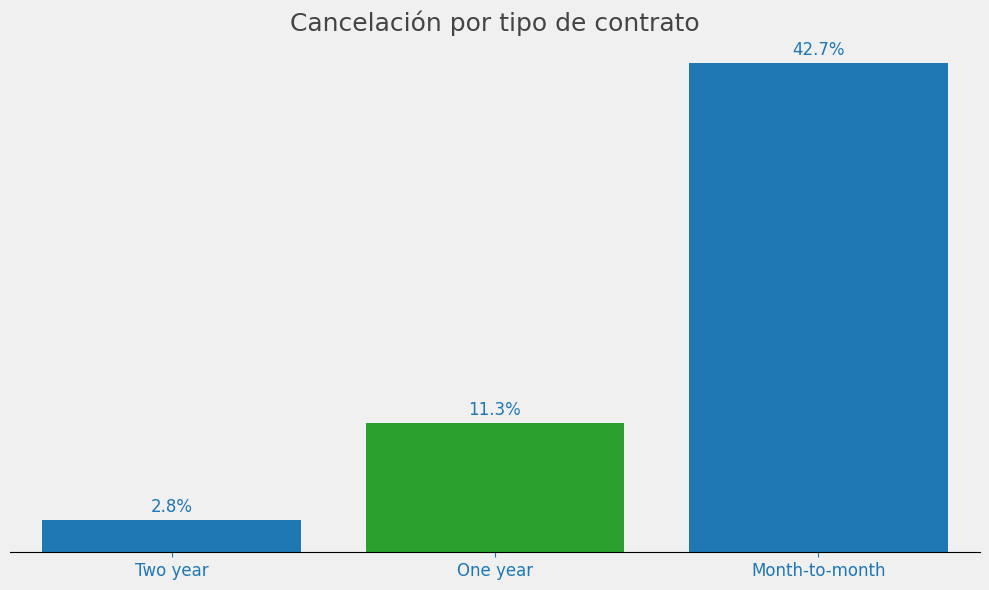

In [36]:
cancelacion_tipo_contrato().show()

In [37]:
def cancelacion_servicios_adicionales():

  # Lista de servicios adicionales
  servicios = ['seguridad_en_linea', 'soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico']
  titulos = ['Seguridad en línea', 'soporte en línea', 'Protección de dispositivos', 'Soporte técnico']

  # Orden lógico de categorías
  orden = ['No', 'Yes', 'No internet service']

  # Crear figura y ejes
  fig, axs = plt.subplots(2, 2, figsize=(12, 8))
  fig.subplots_adjust(hspace=0.5, wspace=0.3)
  fig.suptitle('Cancelación según servicios adicionales', fontsize=20, color=GRIS)
  fig.patch.set_facecolor('#f0f0f0')  # fondo de la figura

  # Gráficas
  for i, (servicio, titulo) in enumerate(zip(servicios, titulos)):
      fila = i // 2
      col = i % 2
      ax = axs[fila, col]
      ax.set_facecolor('#f0f0f0')  # fondo del gráfico individual

      # Gráfica de barras sin usar hue
      plot = sns.barplot(
      x=servicio,
      y='cancelo',
      data=df_plano,
      estimator=lambda x: x.mean() * 100,
      order=orden,
      errorbar=None,
      hue=servicio,           # agregamos hue (aunque no usaremos leyenda)
      legend=False,           # ocultamos leyenda
      ax=ax,
      palette=[AZUL, VERDE, AZUL]
  )


      # Título
      ax.set_title(titulo, fontsize=16, color=GRIS)

      # Etiqueta del eje Y solo en la primera columna
      if col == 0:
          ax.set_ylabel('')
          ax.set_yticklabels([])  # suprimir etiquetas y
          ax.tick_params(axis='y', length=0)  # sin ticks eje y
      else:
          ax.set_ylabel('')
          ax.set_yticklabels([])
          ax.tick_params(axis='y', length=0)

      # Eje X
      ax.set_xlabel('')
      ax.tick_params(axis='x', labelsize=12, colors=AZUL)

      # Bordes
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

      # Rango común para comparar
      ax.set_ylim(0, 50)

      # Etiquetas sobre las barras
      for container in ax.containers:
          ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3, color=AZUL, fontsize=12)

  plt.tight_layout(rect=[0, 0, 1, 0.95])  # para que el título no se encime

  return plt

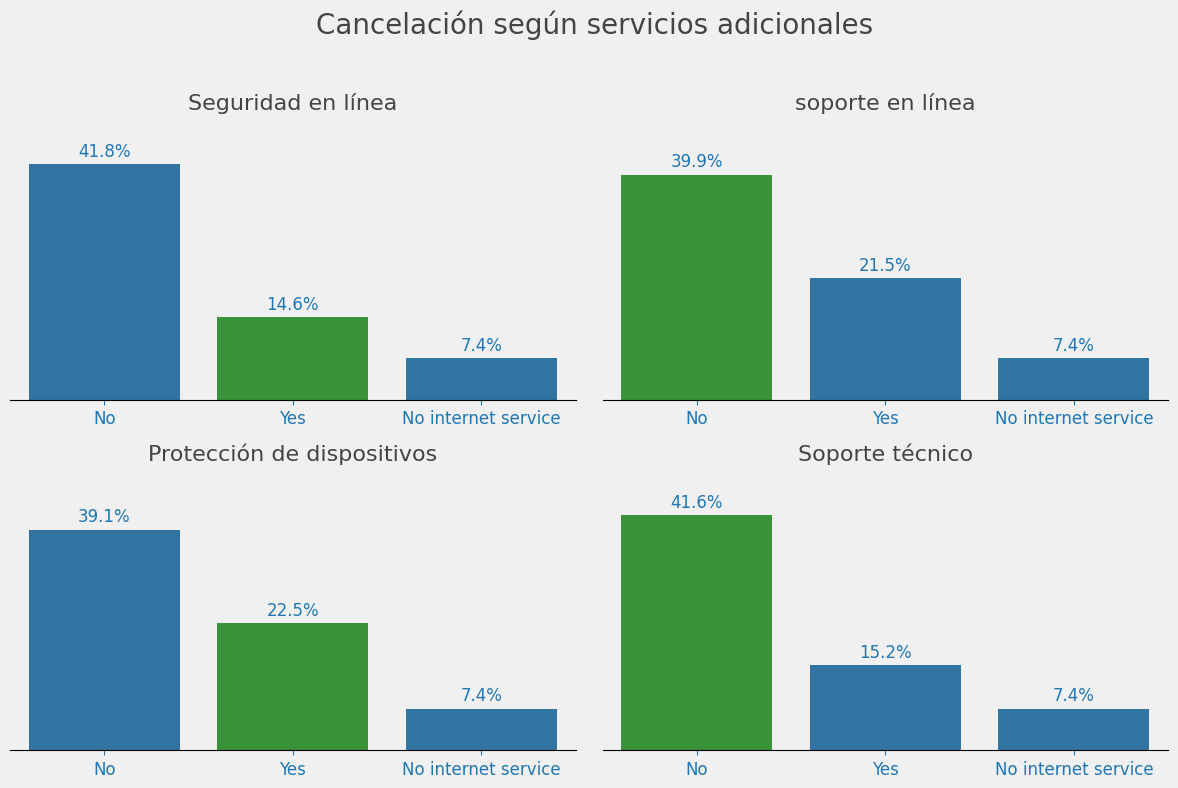

In [38]:
cancelacion_servicios_adicionales().show()

In [39]:
# Realizar recuentos cruzados con cancelo
variables_binarias = ['mayor_de_65', 'tiene_pareja', 'tiene_dependientes']

for col in variables_binarias:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df_plano[col], df_plano['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por mayor_de_65 ---
cancelo      False  True 
mayor_de_65              
0            76.39  23.61
1            58.32  41.68

--- Porcentaje de evasión por tiene_pareja ---
cancelo       False  True 
tiene_pareja              
False         67.04  32.96
True          80.34  19.66

--- Porcentaje de evasión por tiene_dependientes ---
cancelo             False  True 
tiene_dependientes              
False               68.72  31.28
True                84.55  15.45


In [40]:
def cancelacion_bin():

  plt.figure(figsize=(14, 4))


  for i, var in enumerate(variables_binarias):
      plt.subplot(1, 4, i+1)

      # Calcular porcentaje de cancelación
      data = df_plano.groupby(var)['cancelo'].mean() * 100
      categorias = data.index
      valores = data.values

      # Convertimos a DataFrame para usar x=hue
      temp_df_plano = pd.DataFrame({var: categorias, 'cancelacion': valores})

      # Gráfico de barras con colores alternos
      sns.barplot(
          data=temp_df_plano,
          x=var,
          y='cancelacion',
          hue=var,
          palette=[AZUL, VERDE],
          legend=False
      )

      # Texto sobre las barras
      for j, v in enumerate(valores):
          plt.text(j, v + 2, f'{v:.1f}%', ha='center', fontsize=12, color=AZUL)

      # Limites y personalización
      plt.ylim(0, 100)
      plt.title(var.replace('_', ' ').capitalize(), fontsize=16, )

      # Eje Y sin etiquetas ni ylabel
      plt.tick_params(axis='y', labelleft=False)
      plt.ylabel('')

      # Eje X personalizado
      plt.xlabel('')
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()

  return plt

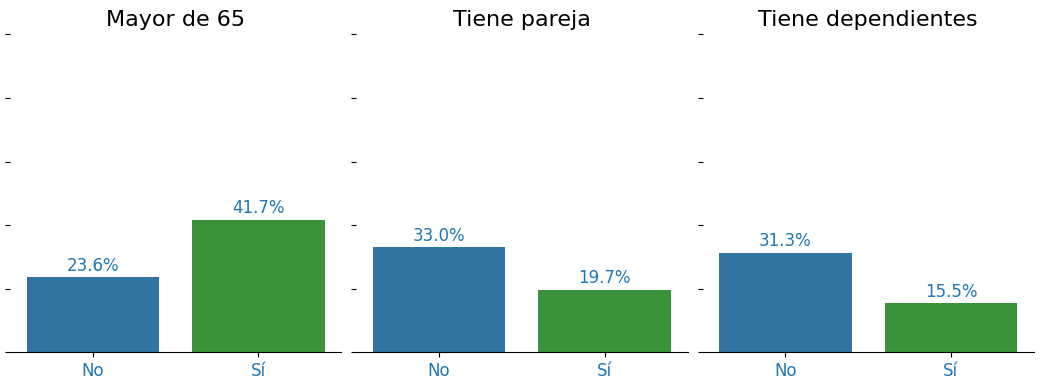

In [41]:
cancelacion_bin().show()

In [42]:
# Variables numericas

columnas_numericas = ['gastos_mensuales', 'gastos_totales', 'Cuentas_Diarias']

# Promedios y desviaciones por grupo
df_plano.groupby('cancelo')[['gastos_mensuales', 'gastos_totales', 'Cuentas_Diarias']].agg(['mean', 'std'])


gastos_mensuales            gastos_totales               \
                    mean        std           mean          std   
cancelo                                                           
False          61.265124  31.092648    2555.344141  2329.456984   
True           74.441332  24.666053    1531.796094  1890.822994   

        Cuentas_Diarias            
                   mean       std  
cancelo                            
False          2.042171  1.036422  
True           2.481378  0.822202

In [43]:
print(columnas_numericas)
print(type(columnas_numericas))

['gastos_mensuales', 'gastos_totales', 'Cuentas_Diarias']
<class 'list'>


In [44]:
def boxplot_cancelacion(columnas_numericas):

  plt.figure(figsize=(15, 5))
  plt.gcf().set_facecolor('#F2F2F2')  # Fondo claro

  for i, col in enumerate(columnas_numericas):
      plt.subplot(1, 3, i + 1)

      # Boxplot con alternancia de colores
      sns.boxplot(
      x='cancelo',
      y=col,
      hue='cancelo',
      data=df_plano,
      showfliers=False,
      palette=[AZUL, VERDE],
      legend=False
     )



      # Título en GRIS
      plt.title(f'{col.replace("_", " ").capitalize()} según cancelación', fontsize=16, color=GRIS)

      # Eje X
      plt.xlabel('Canceló', fontsize=12, color=AZUL)
      plt.xticks([0, 1], ['No', 'Sí'], fontsize=12, color=AZUL)

      # Eje Y
      plt.ylabel(col.replace('_', ' ').capitalize(), fontsize=12, color=AZUL)
      plt.tick_params(axis='y', labelsize=12, colors=AZUL)

      # Eliminar bordes superior, derecho e izquierdo
      ax = plt.gca()
      ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
      ax.spines['top'].set_visible(False)
      ax.spines['right'].set_visible(False)
      ax.spines['left'].set_visible(False)

  plt.tight_layout()
  return plt


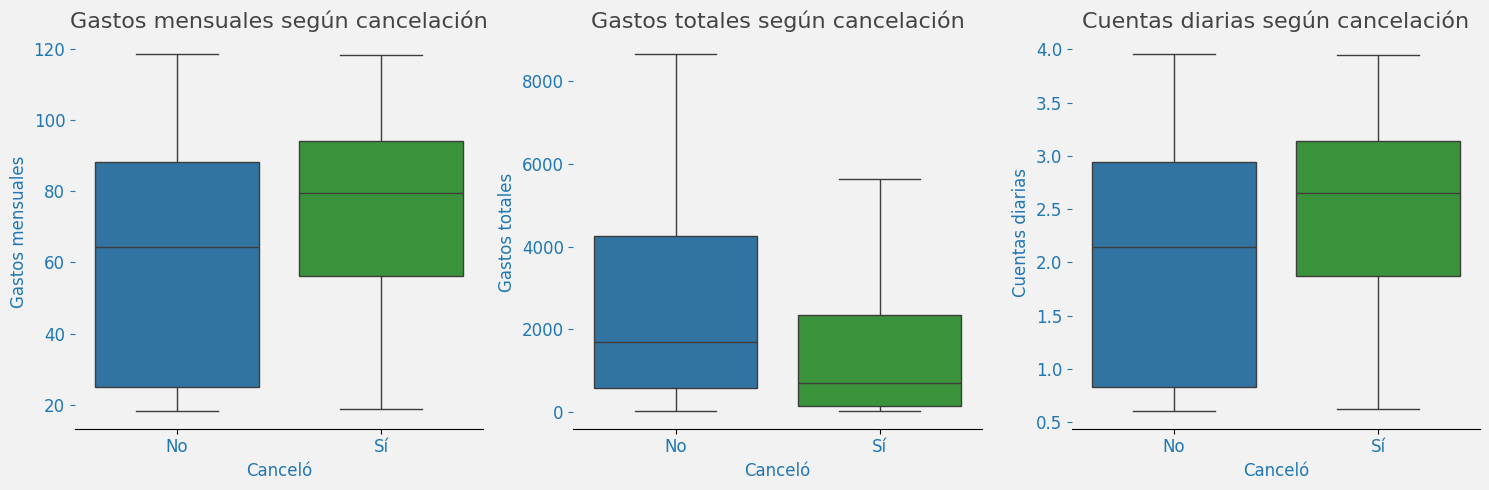

In [45]:
boxplot_cancelacion(columnas_numericas).show()

In [46]:
def cancelacion_segun_meses():

  # Boxplot para meses de contrato
  plt.figure(figsize=(10, 5))
  sns.boxplot(x='cancelo', y='meses_de_contrato', data=df_plano, showfliers=False)
  plt.title('Meses de contrato según cancelación', fontsize=18, color=GRIS)
  plt.xlabel('Canceló')
  plt.ylabel('Meses de contrato')

  # Eliminar bordes superior, derecho e izquierdo
  ax = plt.gca()
  ax.set_facecolor('#F2F2F2')  # Fondo claro en subplot
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)


  plt.tight_layout()
  return plt

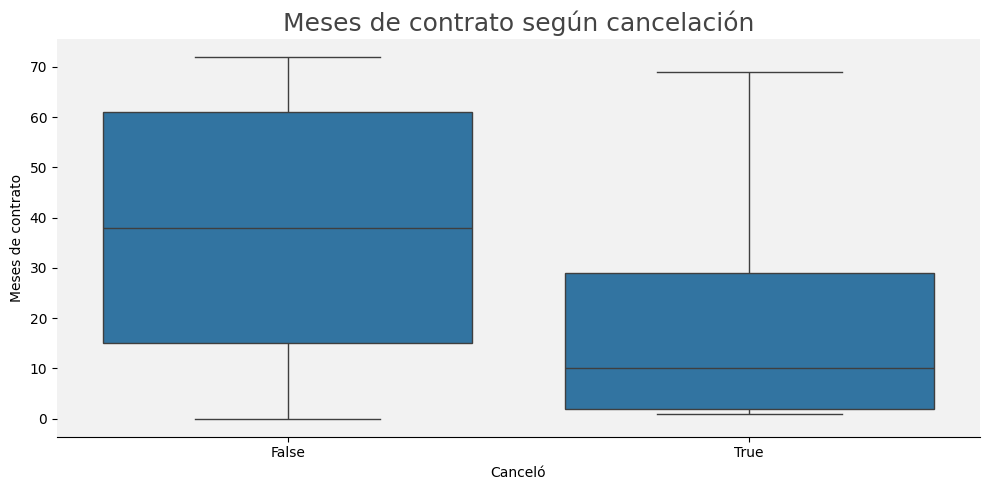

In [47]:
cancelacion_segun_meses().show()

##Informe Final

En el contexto actual de alta competencia en el sector de telecomunicaciones, la retención de clientes se ha convertido en un factor crítico para garantizar la sostenibilidad y el crecimiento de las empresas. Telecom X enfrenta una tasa de cancelaciones significativa, fenómeno conocido como churn, que afecta directamente sus ingresos y su participación en el mercado.

El presente informe tiene como objetivo presentar el proceso de análisis realizado para comprender los factores que inciden en la pérdida de clientes. Para ello, se emplearon técnicas de Extracción, Transformación y Carga (ETL) sobre datos obtenidos mediante una API, seguidas de un Análisis Exploratorio de Datos (EDA) orientado a identificar patrones y tendencias relevantes.

La metodología incluyó la manipulación de datos con Python y sus principales bibliotecas, así como la creación de visualizaciones estratégicas que facilitan la interpretación de los resultados. Los hallazgos obtenidos proporcionarán al equipo de Data Science una base sólida para el desarrollo de modelos predictivos y el diseño de estrategias que permitan reducir la evasión, optimizar la experiencia del cliente y fortalecer la fidelización.

El gráfico de cancelación por genéro muestra la cantidad de clientes que cancelaron y no cancelaron el servicio. Se observa que la proporción de cancelación es muy similar entre hombres y mujeres, con aproximadamente un 27% en ambos casos. Esto indica que el género no representa un factor relevante en la decisión de cancelar, por lo que las estrategias de retención no deberían enfocarse en este aspecto, sino en otras variables con mayor influencia en la evasión.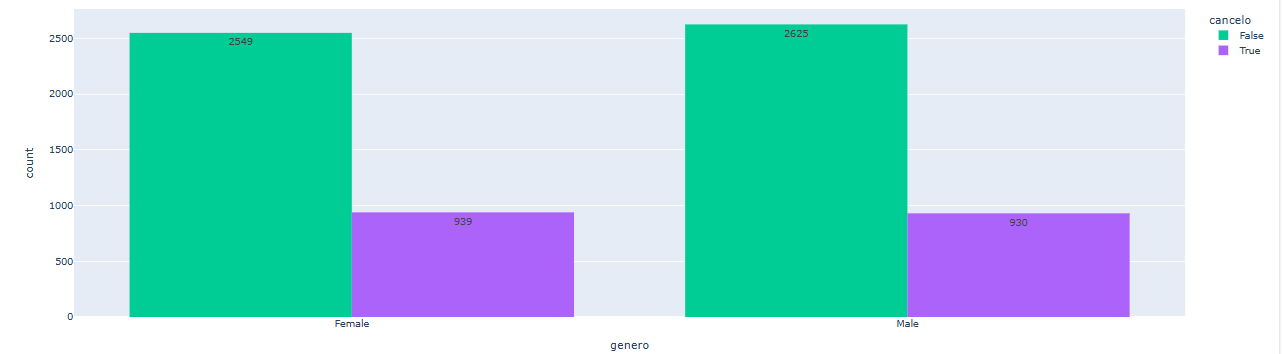

El gráfico muestra el porcentaje de cancelación según el tipo de servicio de internet contratado. Los clientes sin servicio de internet presentan la menor tasa de cancelación (7,4%), seguidos por quienes usan conexión DSL (19%). En contraste, los usuarios con fibra óptica tienen la tasa más alta, alcanzando el 41,9%. Esto sugiere que los clientes con fibra óptica, a pesar de disponer de una tecnología más avanzada, son más propensos a cancelar, lo que podría estar relacionado con factores como el costo, expectativas no cumplidas o una mayor competencia en ese segmento.


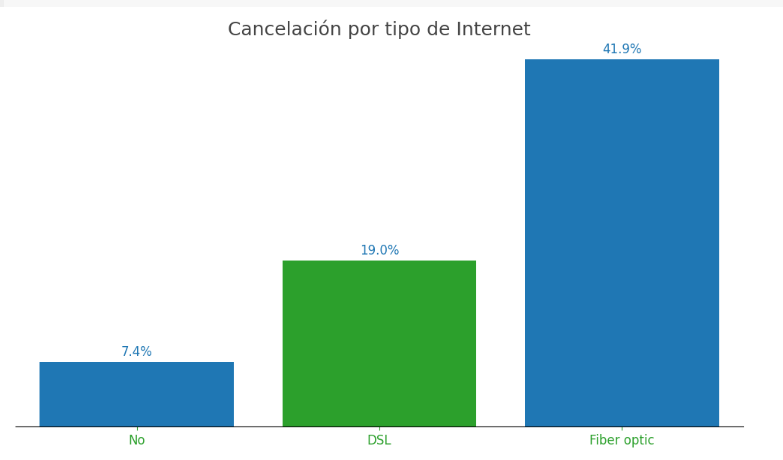






Preguntar a ChatGPT


El gráfico compara las tasas de cancelación según la contratación o no de servicios adicionales. En todos los casos, los clientes que no cuentan con el servicio adicional presentan tasas de cancelación notablemente más altas, superando el 39%, mientras que aquellos que sí lo tienen muestran porcentajes considerablemente menores. Por ejemplo, en Seguridad en línea la cancelación baja del 41,8% al 14,6%, y en Soporte técnico pasa del 41,6% al 15,2%. Los clientes sin servicio de internet mantienen una tasa baja y constante (7,4%). Estos resultados sugieren que la contratación de servicios adicionales podría estar asociada a una mayor permanencia, posiblemente por un mayor nivel de satisfacción o un compromiso más fuerte con la empresa.
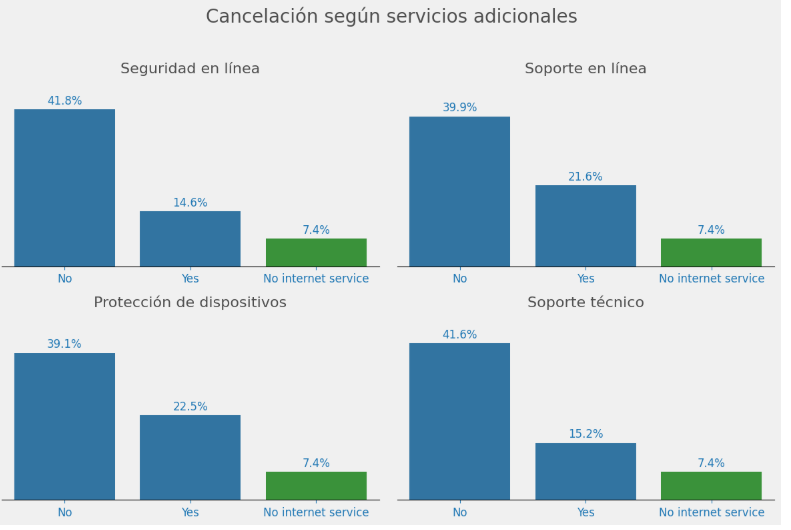

El siguiente gráfico presenta la tasa de cancelación según tres variables demográficas: mayor de 65 años, tener pareja y tener dependientes.
Se observa que los clientes mayores de 65 años tienen una tasa de cancelación significativamente más alta (41,7%) en comparación con los menores de 65 (23,6%). En cambio, contar con pareja o dependientes parece asociarse con una menor probabilidad de cancelar: las tasas bajan de 33,0% a 19,7% en el caso de tener pareja y de 31,3% a 15,5% en el caso de tener dependientes. Esto sugiere que los clientes con vínculos familiares o responsabilidades compartidas tienden a ser más estables y permanecer más tiempo con la empresa, mientras que la población mayor puede ser un segmento más propenso a la evasión y requerir estrategias específicas de retención.
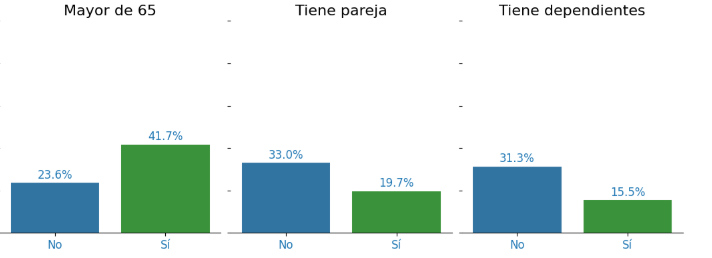

El gráfico compara la distribución de gastos mensuales, gastos totales y cuentas diarias entre clientes que cancelaron y los que permanecieron.
Se observa que quienes cancelaron presentan gastos mensuales más altos en promedio, mientras que sus gastos totales acumulados son menores, lo que sugiere que estos clientes llevan menos tiempo en la compañía pero con pagos más elevados. En cuanto a las cuentas diarias, los clientes que cancelaron muestran valores ligeramente superiores, coherente con los gastos mensuales más altos. Esto podría indicar que las tarifas elevadas en periodos cortos de permanencia están asociadas a una mayor probabilidad de cancelación.
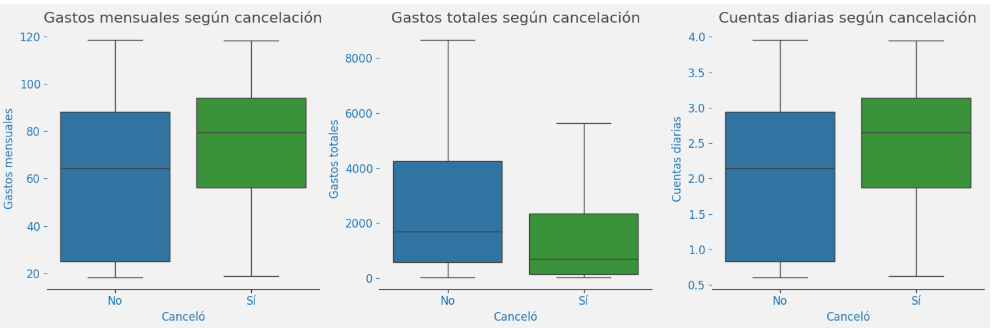

El gráfico muestra la distribución de los meses de contrato según si el cliente canceló o no el servicio.
Se observa que los clientes que no cancelaron tienen una mediana de permanencia mucho mayor, alrededor de 38 meses, mientras que los que sí cancelaron presentan una mediana cercana a los 10 meses. Además, el rango intercuartílico de los cancelados es más reducido, concentrándose en clientes con contratos de corta duración. Esto sugiere que la probabilidad de cancelación es significativamente más alta durante los primeros meses de contrato, y que a medida que aumenta el tiempo de permanencia, la fidelidad del cliente tiende a consolidarse.
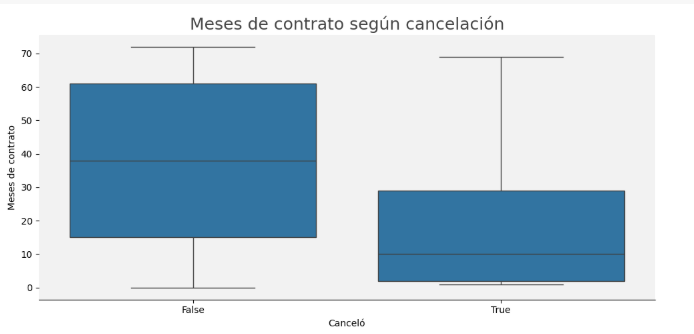

Conclusiones
El análisis realizado sobre el churn de clientes en Telecom X revela que el género no influye significativamente en la decisión de cancelar, ya que hombres y mujeres presentan porcentajes similares de evasión. Sin embargo, el tipo de servicio de internet sí muestra diferencias importantes: los usuarios de fibra óptica concentran la mayor tasa de cancelación, seguidos por quienes utilizan DSL, mientras que los clientes sin internet presentan los niveles más bajos. Asimismo, se observa que la contratación de servicios adicionales como seguridad en línea, soporte técnico y protección de dispositivos está asociada a menores tasas de cancelación, lo que sugiere que estos servicios incrementan la permanencia.

En cuanto a las variables demográficas, los clientes mayores de 65 años son el grupo con mayor propensión a cancelar, mientras que aquellos con pareja o dependientes tienden a mantener el servicio por más tiempo. El análisis de los patrones de gasto y permanencia indica que quienes cancelan suelen tener gastos mensuales más altos pero gastos totales menores, lo que apunta a que son clientes de reciente incorporación con tarifas elevadas. Finalmente, los datos muestran que la cancelación se concentra en los primeros meses de contrato, mientras que la permanencia prolongada se asocia a una mayor fidelidad.

Recomendaciones
A partir de estos hallazgos, se recomienda priorizar las acciones de retención en segmentos de alto riesgo, como los usuarios de fibra óptica, clientes mayores de 65 años y aquellos con contratos recientes. Es necesario revisar las políticas de precios para clientes con gastos mensuales elevados, asegurando que perciban un valor acorde al costo y considerando la implementación de descuentos o beneficios adicionales. Resulta estratégico promover la contratación de servicios adicionales, dado su impacto positivo en la permanencia, mediante campañas específicas y ofertas atractivas.

También se sugiere el desarrollo de programas de fidelización que recompensen la antigüedad y fomenten la vinculación, especialmente entre clientes sin pareja o dependientes, que presentan mayor propensión a cancelar. Finalmente, se recomienda implementar un sistema de monitoreo continuo y el desarrollo de modelos predictivos de churn que permitan anticipar comportamientos de cancelación y ajustar las estrategias de retención de manera oportuna.